In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
pip install streamlit-jupyter

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
dataset=pd.read_csv(r"E:\New folder\SMS dataset.csv")

In [7]:
dataset.head()

,ID,Cardholders,Label,Unnamed: 3,Date,SMS
0,569930573468793000,user1,NaN,Received,1/22/2019 14:02,Account *****535 has been created for you.
1,569930580988891000,user1,NaN,Received,1/22/2019 14:03,"Dear Customer, thank you for opening a new AED..."
2,569935786657492000,user1,NaN,Received,1/22/2019 15:29,"Dear Customer, thank you for requesting a new ..."
3,573542794518877000,user1,NaN,Received,3/5/2019 9:26,"Dear Customer, AED 25806.50 was credited to yo..."
4,573677550725358000,user1,NaN,Received,3/6/2019 22:52,"Dear Customer, AED 12800.00 was debited from y..."


In [8]:
df=pd.DataFrame(dataset)

In [9]:
df=df[['Date','SMS']].copy()

In [10]:
df.head()

,Date,SMS
0,1/22/2019 14:02,Account *****535 has been created for you.
1,1/22/2019 14:03,"Dear Customer, thank you for opening a new AED..."
2,1/22/2019 15:29,"Dear Customer, thank you for requesting a new ..."
3,3/5/2019 9:26,"Dear Customer, AED 25806.50 was credited to yo..."
4,3/6/2019 22:52,"Dear Customer, AED 12800.00 was debited from y..."


In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [12]:
df.head()

,Date,SMS
0,2019-01-22 14:02:00,Account *****535 has been created for you.
1,2019-01-22 14:03:00,"Dear Customer, thank you for opening a new AED..."
2,2019-01-22 15:29:00,"Dear Customer, thank you for requesting a new ..."
3,2019-03-05 09:26:00,"Dear Customer, AED 25806.50 was credited to yo..."
4,2019-03-06 22:52:00,"Dear Customer, AED 12800.00 was debited from y..."


In [13]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

In [14]:
df.head()

,Date,SMS,Month,Year,Day
0,2019-01-22 14:02:00,Account *****535 has been created for you.,1,2019,22
1,2019-01-22 14:03:00,"Dear Customer, thank you for opening a new AED...",1,2019,22
2,2019-01-22 15:29:00,"Dear Customer, thank you for requesting a new ...",1,2019,22
3,2019-03-05 09:26:00,"Dear Customer, AED 25806.50 was credited to yo...",3,2019,5
4,2019-03-06 22:52:00,"Dear Customer, AED 12800.00 was debited from y...",3,2019,6


In [15]:
df['SMS'] = df['SMS'].str.lower()

# Remove extra spaces
df['SMS'] = df['SMS'].str.strip()

In [16]:
df.head()

,Date,SMS,Month,Year,Day
0,2019-01-22 14:02:00,account *****535 has been created for you.,1,2019,22
1,2019-01-22 14:03:00,"dear customer, thank you for opening a new aed...",1,2019,22
2,2019-01-22 15:29:00,"dear customer, thank you for requesting a new ...",1,2019,22
3,2019-03-05 09:26:00,"dear customer, aed 25806.50 was credited to yo...",3,2019,5
4,2019-03-06 22:52:00,"dear customer, aed 12800.00 was debited from y...",3,2019,6


In [17]:
df.isnull().sum()

Date     0
SMS      0
Month    0
Year     0
Day      0
dtype: int64

In [18]:
import re
def extract_amount(text):
    match = re.search(r'(?i)(?:inr|aed|₹)\s?([\d,]+\.?\d*)', text)
    if match:
        return float(match.group(1).replace(',', ''))
    return None

df['Amount'] = df['SMS'].apply(extract_amount)

In [19]:
def extract_type(text):
    text = text.lower()
    if "debited" in text:
        return "Debit"
    elif "credited" in text:
        return "Credit"
    else:
        return "Other"

df['Type'] = df['SMS'].apply(extract_type)


In [20]:
def extract_merchant(text):
    # Try to find after 'at' or 'via'
    match = re.search(r'(?:at|via)\s([A-Za-z0-9 &]+)', text)
    if match:
        merchant = match.group(1).strip()
        # Remove trailing words like "for", "on", etc.
        merchant = re.split(r'\s(for|on|in|to)\b', merchant)[0]
        return merchant
    return None

df['Merchant'] = df['SMS'].apply(extract_merchant)


In [21]:
df[['Date', 'Amount', 'Type', 'Merchant']].head(10)


,Date,Amount,Type,Merchant
0,2019-01-22 14:02:00,NaN,Other,None
1,2019-01-22 14:03:00,NaN,Other,None
2,2019-01-22 15:29:00,NaN,Other,the earliest
3,2019-03-05 09:26:00,25806.50,Credit,None
4,2019-03-06 22:52:00,12800.00,Debit,None
5,2019-03-08 10:02:00,50.00,Other,abu dhabi national oil abu dhabi ae
6,2019-03-10 18:49:00,78.75,Other,art house cafe abu dhabi ae
7,2019-03-10 20:49:00,100.00,Debit,None
8,2019-03-10 22:01:00,12000.00,Debit,None
9,2019-03-11 10:11:00,40.00,Other,zomato order dubai ae


In [22]:
df.to_csv("parsed_transactions.csv", index=False)

In [23]:
import pandas as pd

# Example mapping dictionary (you can expand this anytime)
category_map = {
    'swiggy': 'Food',
    'zomato': 'Food',
    'ubereats': 'Food',
    'uber': 'Travel',
    'ola': 'Travel',
    'irctc': 'Travel',
    'amazon': 'Shopping',
    'flipkart': 'Shopping',
    'myntra': 'Shopping',
    'ajio': 'Shopping',
    'airtel': 'Bills',
    'vodafone': 'Bills',
    'jio': 'Bills',
    'paytm': 'Transfer',
    'gpay': 'Transfer',
    'phonepe': 'Transfer',
    'hdfc': 'Banking',
    'sbi': 'Banking',
    'axis': 'Banking',
    'Unknown': 'Other'
}

# Apply mapping to Merchant column
def map_category(merchant):
    merchant = str(merchant).lower()
    for key, value in category_map.items():
        if key in merchant:
            return value
    return 'Other'  # default category if no match found

# Create new Category column
df['Category'] = df['Merchant'].apply(map_category)

# Check the first few rows
df[['Merchant', 'Category']].head(10)


,Merchant,Category
0,None,Other
1,None,Other
2,the earliest,Other
3,None,Other
4,None,Other
5,abu dhabi national oil abu dhabi ae,Other
6,art house cafe abu dhabi ae,Other
7,None,Other
8,None,Other
9,zomato order dubai ae,Food


In [24]:
category_map.update({
    'cafe': 'Food',
    'restaurant': 'Food',
    'oil': 'Bills',
    'abu dhabi': 'Shopping',
    'art house': 'Food',
    'zomato': 'Food',
    'carrefour': 'Shopping',
    'amazon': 'Shopping',
    'noon': 'Shopping'
})


In [25]:
df['Category'] = df['Merchant'].apply(map_category)
df['Category'].value_counts()


Category
Other       1709
Shopping     141
Food          34
Bills          9
Travel         1
Name: count, dtype: int64

In [26]:
df[df['Category'] == 'Other']['Merchant'].value_counts().head(30)

Merchant
starbucks                               54
apple                                   37
mcdonalds                               15
du                                      12
talabat middle east                      9
adnoc                                    8
707                                      7
www                                      5
galadari ice cream co l dubai ae         4
smart dubai government dubai ae          4
adnoc al mafraq s                        4
al ansari exchange llc du bai ae         3
save my exams                            3
mcdonalds sharjah ae                     3
adnoc al salams                          3
baniyas co                               3
first food servi                         3
tea junction express   ab u dhabi ae     3
adnoc distribution     ab u dhabi ae     3
talabat com            du bai ae         3
deliveroo dmcc         04 5126268 ae     3
uae                                      3
advanced cnt day care  ab u dhabi ae     2
de

In [27]:
category_map.update({
    # 🍔 Food & Beverages
    'starbucks': 'Food',
    'mcdonalds': 'Food',
    'tea junction': 'Food',
    'tim hortons': 'Food',
    'first food': 'Food',
    'continental food': 'Food',
    'talabat': 'Food',
    'deliveroo': 'Food',
    'kuwait food': 'Food',
    'galadari ice cream': 'Food',
    
    # 🛍️ Shopping
    'apple': 'Shopping',
    'lulu': 'Shopping',
    'baniyas': 'Shopping',
    'save my exams': 'Shopping',
    'uae': 'Shopping',  # general stores
    'smart dubai': 'Shopping',
    
    # 🧾 Bills / Utilities
    'du': 'Bills',
    'adnoc': 'Bills',
    'distribution': 'Bills',
    'oil': 'Bills',
    'day care': 'Bills',
    
    # 💸 Transfers / Financial Services
    'exchange': 'Transfer',
    'ansari': 'Transfer'
})


In [28]:
def map_category(merchant):
    merchant = str(merchant).lower()
    for key, value in category_map.items():
        if key in merchant:
            return value
    return 'Other'

df['Category'] = df['Merchant'].apply(map_category)
df['Category'].value_counts()


Category
Other       1466
Shopping     200
Food         149
Bills         78
Travel         1
Name: count, dtype: int64

# 

In [29]:
df['Category'] = df['Category'].replace({'Travel': 'Other'})


In [30]:
df['Category'].value_counts()


Category
Other       1467
Shopping     200
Food         149
Bills         78
Name: count, dtype: int64

In [31]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Category'] == 'Other']
df_minority = df[df['Category'] != 'Other']

# Downsample majority class
df_majority_down = resample(df_majority,
                            replace=True,
                            n_samples=400,  # keep ~400 "Other"
                            random_state=42)

# Combine back
df_balanced = pd.concat([df_majority_down, df_minority])

df_balanced['Category'].value_counts()


Category
Other       400
Shopping    200
Food        149
Bills        78
Name: count, dtype: int64

In [32]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Define features and target
X_text = df['Merchant']          # Text feature
X_type = df['Type']              # Categorical feature
y = df['Category']               # Target


In [33]:
# Clean text column before vectorizing
X_text = df['Merchant'].fillna('').astype(str)

In [34]:
# Convert text into numeric vectors
vectorizer = CountVectorizer()
X_text_vec = vectorizer.fit_transform(X_text)

In [35]:
df['Merchant'].head(10)

0                                   None
1                                   None
2                           the earliest
3                                   None
4                                   None
5    abu dhabi national oil abu dhabi ae
6            art house cafe abu dhabi ae
7                                   None
8                                   None
9                  zomato order dubai ae
Name: Merchant, dtype: object

In [36]:
df['Merchant'].isnull().sum()

np.int64(1380)

In [37]:
# Convert to string and lowercase
df['Merchant'] = df['Merchant'].astype(str).str.lower()

# Drop rows with missing or invalid merchant names
df = df[~df['Merchant'].isin(['none', 'nan', '', 'the earliest'])]

# Reset index after cleaning
df = df.reset_index(drop=True)

# Check a few samples again
df['Merchant'].head(10)


0    abu dhabi national oil abu dhabi ae
1            art house cafe abu dhabi ae
2                  zomato order dubai ae
3    abu dhabi national oil abu dhabi ae
4      flakes hub resturant abu dhabi ae
5               breath cafe abu dhabi ae
6            art house cafe abu dhabi ae
7    abu dhabi national oil abu dhabi ae
8                                    www
9         gerard patisserie abu dhabi ae
Name: Merchant, dtype: object

In [38]:
df.shape

(513, 9)

In [39]:
df.columns

Index(['Date', 'SMS', 'Month', 'Year', 'Day', 'Amount', 'Type', 'Merchant',
       'Category'],
      dtype='object')

In [40]:
df[['Merchant', 'Type', 'Category']].isnull().sum()

Merchant    0
Type        0
Category    0
dtype: int64

In [41]:
# Clean text
X_text = df['Merchant'].fillna('').astype(str)
X_type = df['Type']
y = df['Category']

# Vectorize Merchant text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_text_vec = vectorizer.fit_transform(X_text)

# Encode Type
from sklearn.preprocessing import LabelEncoder
import numpy as np
type_encoder = LabelEncoder()
X_type_enc = type_encoder.fit_transform(X_type)
X_type_enc = np.array(X_type_enc).reshape(-1, 1)

# Combine text + type
from scipy.sparse import hstack
X_final = hstack([X_text_vec, X_type_enc])

# Split & Train
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n", classification_report(y_test, y_pred))


✅ Accuracy: 91.26 %

               precision    recall  f1-score   support

       Bills       0.94      0.88      0.91        17
        Food       0.93      0.96      0.95        27
       Other       0.75      0.92      0.83        13
    Shopping       0.95      0.89      0.92        46

    accuracy                           0.91       103
   macro avg       0.89      0.91      0.90       103
weighted avg       0.92      0.91      0.91       103



In [43]:
# Example unseen transaction
new_merchant = ["talabat dubai"]  
new_type = ["Debit"]              

# Convert text and type using trained encoders
new_vec = vectorizer.transform(new_merchant)
new_type_enc = type_encoder.transform(new_type).reshape(-1, 1)

# Combine both
from scipy.sparse import hstack
new_input = hstack([new_vec, new_type_enc])

# Predict category
prediction = model.predict(new_input)
print("🧠 Predicted Category:", prediction[0])


🧠 Predicted Category: Food


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


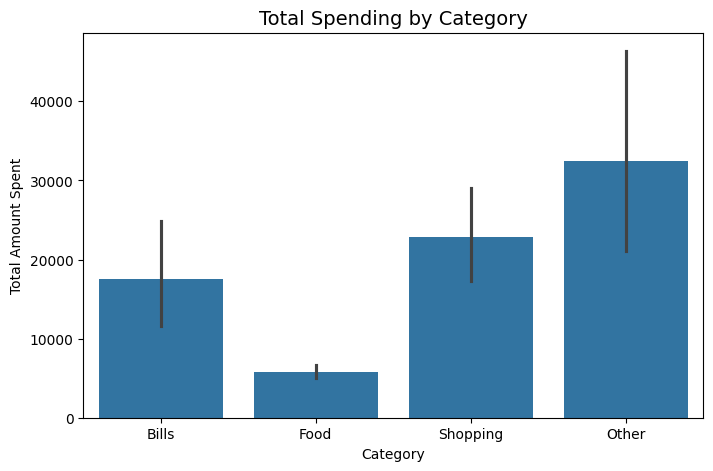

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Amount', data=df, estimator=sum)
plt.title('Total Spending by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Total Amount Spent')
plt.show()


In [46]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: to make charts look nice
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('pastel')


C:\Users\Jishnu PB\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


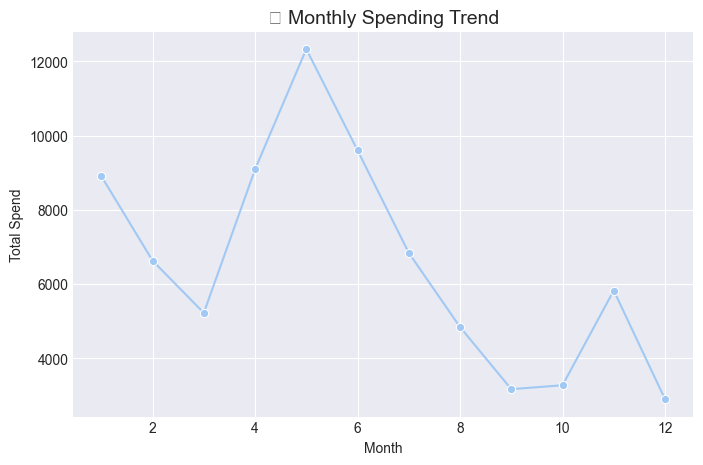

In [47]:
monthly_spend = df.groupby(['Month'])['Amount'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='Month', y='Amount', data=monthly_spend, marker='o')
plt.title('📆 Monthly Spending Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.show()


In [48]:
df['Type'] = df['Type'].replace({'Other': 'Credit'})

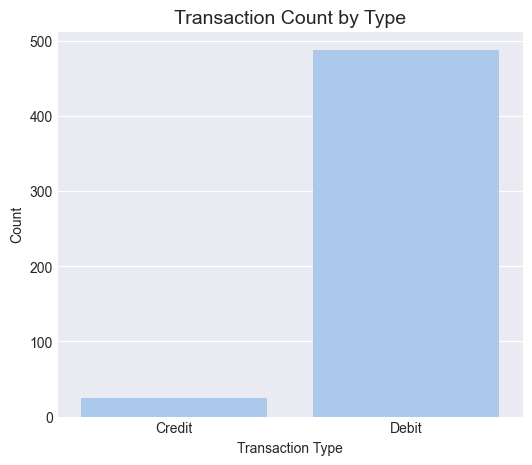

In [49]:
plt.figure(figsize=(6,5))
sns.countplot(x='Type', data=df)
plt.title('Transaction Count by Type', fontsize=14)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


C:\Users\Jishnu PB\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


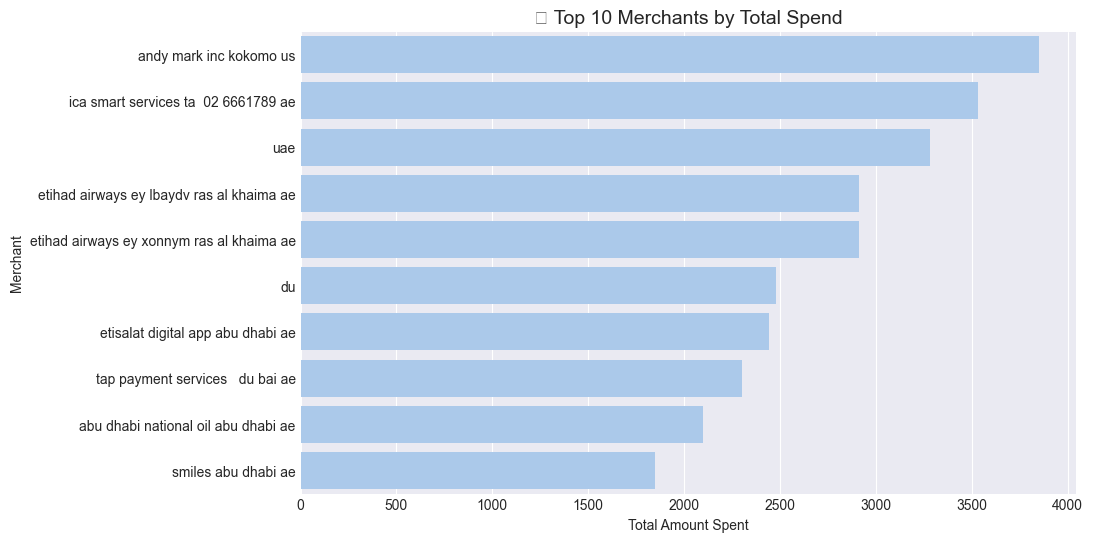

In [50]:
top_merchants = df.groupby('Merchant')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_merchants.values, y=top_merchants.index)
plt.title('🏪 Top 10 Merchants by Total Spend', fontsize=14)
plt.xlabel('Total Amount Spent')
plt.ylabel('Merchant')
plt.show()


C:\Users\Jishnu PB\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


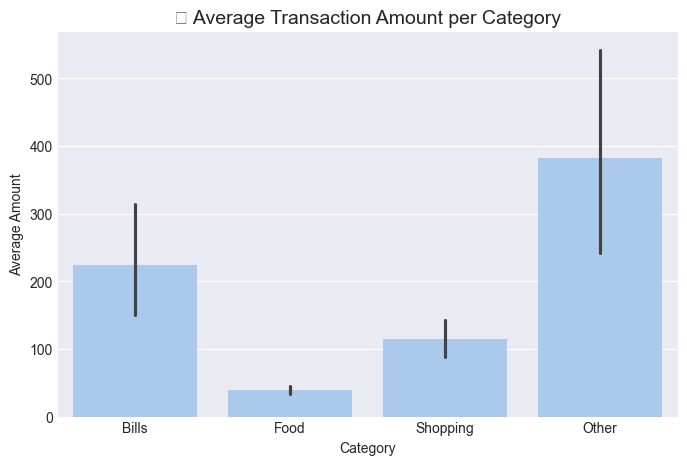

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Amount', data=df, estimator='mean')
plt.title('📈 Average Transaction Amount per Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Average Amount')
plt.show()


C:\Users\Jishnu PB\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


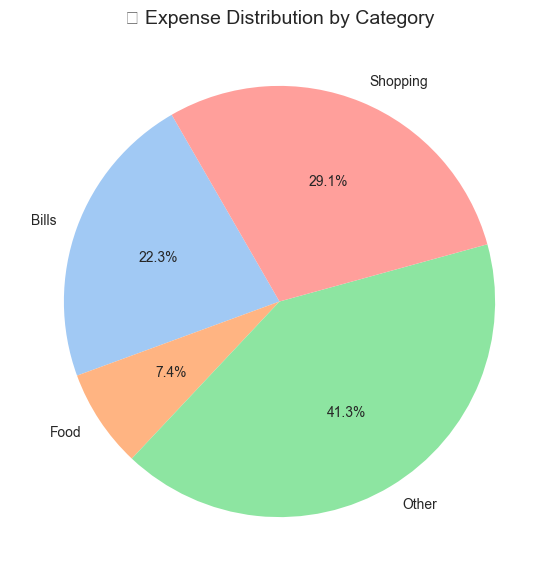

In [52]:
category_share = df.groupby('Category')['Amount'].sum()

plt.figure(figsize=(7,7))
plt.pie(category_share, labels=category_share.index, autopct='%1.1f%%', startangle=120)
plt.title('🧾 Expense Distribution by Category', fontsize=14)
plt.show()


In [53]:
def savings_advice(df):
    total_spent = df[df['Type'] == 'Debit']['Amount'].sum()
    total_credited = df[df['Type'] == 'Credit']['Amount'].sum()
    top_category = df.groupby('Category')['Amount'].sum().idxmax()

    print(f"💰 Total spent: {total_spent:.2f}")
    print(f"💸 Total credited: {total_credited:.2f}")
    print(f"🧾 Highest spending category: {top_category}")

    if total_spent > total_credited * 0.8:
        print("⚠️ You're spending more than 80% of your income! Try reducing expenses.")
    if top_category == 'Food':
        print("🍔 Try limiting food delivery spending or cooking at home.")
    elif top_category == 'Shopping':
        print("🛍️ You’re spending more on shopping. Set a monthly shopping budget.")


In [54]:
savings_advice(df)


💰 Total spent: 76794.43
💸 Total credited: 1846.95
🧾 Highest spending category: Other
⚠️ You're spending more than 80% of your income! Try reducing expenses.


In [1]:
import pandas as pd
import joblib

# Load saved model & vectorizer
model = joblib.load("Finance Advisor Project/category_model.pkl")
vectorizer = joblib.load("Finance Advisor Project/vectorizer.pkl")

# Load unknown file
new_df = pd.read_csv(r"E:\New folder\sms_dataset_4000_model_ready_v8.csv")

# Clean text
new_df['SMS'] = new_df['SMS'].str.lower().str.strip()

# Transform text to numeric using the SAME vectorizer
X_new = vectorizer.transform(new_df['SMS'])

# Predict categories
new_df['Predicted_Category'] = model.predict(X_new)

# Show results
print(new_df[['SMS', 'Predicted_Category']])

# Optionally save the predictions
new_df.to_csv("predicted_transactions.csv", index=False)
print("✅ Predictions saved to predicted_transactions.csv")


C:\Users\Jishnu PB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 1.7.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Jishnu PB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.7.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Jishnu PB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unp

                                                   SMS Predicted_Category
0                    ₹394 paid towards airtel services           Shopping
1        amount ₹6992 paid to deliveroo for food order               Food
2              ₹6086 debited towards order from zomato               Food
3              ₹4158 debited towards order from swiggy               Food
4                 payment to ubereats ₹6419 successful              Other
...                                                ...                ...
3995             ride payment to irctc ₹2685 completed              Other
3996       amount ₹2658 paid to talabat for food order               Food
3997  payment to lulu ₹13313 debited from your account              Other
3998         transaction using exchange ₹175 confirmed           Shopping
3999     transaction from tea junction ₹1325 completed           Shopping

[4000 rows x 2 columns]
✅ Predictions saved to predicted_transactions.csv
